In [0]:
import gensim

In [0]:
from gensim.models import Word2Vec

In [0]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_csv = pd.read_csv('drive/My Drive/ForGensim/train.csv')

In [6]:
print(file_csv['text'])

0        Add another song to the Cita RomГЎntica playli...
1         add clem burke in my playlist Pre-Party R&B Jams
2                  Add Live from Aragon Ballroom to Trapeo
3                        add Unite and Win to my night out
4                      Add track to my Digster Future Hits
                               ...                        
15879    Is Across the Line playing at the closest movi...
15880    Which animated movies are playing in the neigh...
15881          Where is They Always Return at Dawn playing
15882       What is the movie schedule in the neighborhood
15883    Tell me when Howling II: Your Sister Is a Were...
Name: text, Length: 15884, dtype: object


In [0]:
intents = file_csv.intents.unique()

In [8]:
intents

array(['AddToPlaylist', 'BookRestaurant', 'GetWeather', 'PlayMusic',
       'RateBook', 'SearchCreativeWork', 'SearchScreeningEvent'],
      dtype=object)

In [0]:
COUNT_CLASSES = intents.shape[0]

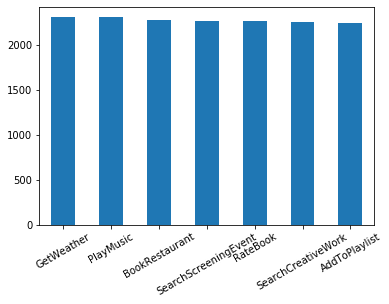

In [10]:
file_csv.intents.value_counts().plot(kind="bar", rot=30)

In [0]:
tokens = []
sentences = file_csv['text']
for sentence in sentences:
  tokens.append(sentence.split())

In [12]:
tokens

[['Add', 'another', 'song', 'to', 'the', 'Cita', 'RomГЎntica', 'playlist.'],
 ['add', 'clem', 'burke', 'in', 'my', 'playlist', 'Pre-Party', 'R&B', 'Jams'],
 ['Add', 'Live', 'from', 'Aragon', 'Ballroom', 'to', 'Trapeo'],
 ['add', 'Unite', 'and', 'Win', 'to', 'my', 'night', 'out'],
 ['Add', 'track', 'to', 'my', 'Digster', 'Future', 'Hits'],
 ['add', 'the', 'piano', 'bar', 'to', 'my', 'Cindy', 'Wilson'],
 ['Add', 'Spanish', 'Harlem', 'Incident', 'to', 'cleaning', 'the', 'house'],
 ['add',
  'The',
  'Greyest',
  'of',
  'Blue',
  'Skies',
  'in',
  'Indie',
  'EspaГ±ol',
  'my',
  'playlist'],
 ['Add',
  'the',
  'name',
  'kids',
  'in',
  'the',
  'street',
  'to',
  'the',
  'plylist',
  'New',
  'Indie',
  'Mix'],
 ['add', 'album', 'radar', 'latino'],
 ['Add', 'Tranquility', 'to', 'the', 'Latin', 'Pop', 'Rising', 'playlist.'],
 ['Add', 'd', 'flame', 'to', 'the', 'Dcode2016', 'playlist.'],
 ['Add', 'album', 'to', 'my', 'fairy', 'tales'],
 ['I',
  'need',
  'another',
  'artist',
  'in'

In [0]:
model = Word2Vec(tokens, size=200, window=10, min_count=3, workers=4)

In [14]:
model.train(tokens, total_examples=len(tokens), epochs=500)

(42143616, 71074500)

In [15]:
model.most_similar('song')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('track', 0.73930424451828),
 ('tune', 0.6635948419570923),
 ('album', 0.5245210528373718),
 ('artist', 0.49486231803894043),
 ('ep', 0.47769486904144287),
 ('NoctГЎmbulo', 0.4258953928947449),
 ('just', 0.4135351777076721),
 ('Trapeo', 0.41151270270347595),
 ('soundtrack', 0.4082266688346863),
 ('record', 0.4072263240814209)]

In [16]:
model.most_similar(positive=['song'], negative=['artist'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('soundtrack', 0.4049502909183502),
 ('concerto', 0.37802690267562866),
 ('melody', 0.37413161993026733),
 ('symphony', 0.3384372889995575),
 ('1957', 0.335806667804718),
 ('ballad', 0.33039212226867676),
 ('record', 0.299427330493927),
 ('stuff', 0.2975198030471802),
 ('photograph', 0.2892451286315918),
 ('Jim', 0.2848447561264038)]

Обучим модель с удалением стоп-слов

In [0]:
import nltk

In [0]:
from nltk.corpus import stopwords

In [0]:
def remove_stopwords(text):
  words = nltk.word_tokenize(text)
  stop_words = set(stopwords.words("english"))
  without_stop_words = [w for w in words if w not in stop_words]
  return without_stop_words

In [56]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
sentences_new = file_csv['text'].apply(lambda x : remove_stopwords(x))

In [58]:
sentences_new

0        [Add, another, song, Cita, RomГЎntica, playlis...
1        [add, clem, burke, playlist, Pre-Party, R, &, ...
2                    [Add, Live, Aragon, Ballroom, Trapeo]
3                                 [add, Unite, Win, night]
4                      [Add, track, Digster, Future, Hits]
                               ...                        
15879    [Is, Across, Line, playing, closest, movie, ho...
15880    [Which, animated, movies, playing, neighbourho...
15881         [Where, They, Always, Return, Dawn, playing]
15882                [What, movie, schedule, neighborhood]
15883    [Tell, Howling, II, :, Your, Sister, Is, Werew...
Name: text, Length: 15884, dtype: object

In [0]:
import numpy as np

In [0]:
sentences_new = np.array(sentences_new)

In [0]:
tokens1 = []

for sentence in sentences_new:
  tokens1.append(sentence)

In [0]:
model_new = Word2Vec(tokens1, size=200, window=10, min_count=3, workers=4)

In [63]:
model_new.train(tokens1, total_examples=len(tokens), epochs=500)

(33123131, 51237500)

In [64]:
model_new.most_similar('weather', topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('humidity', 0.49464312195777893),
 ('forecast', 0.47668513655662537),
 ('temperate', 0.4470370411872864),
 ('temperature', 0.4401853680610657),
 ('Antilles', 0.3927217721939087)]

In [65]:
model_new.most_similar('songs', topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('melody', 0.5071341395378113),
 ('music', 0.4879634976387024),
 ('ep', 0.46621060371398926),
 ('song', 0.46523717045783997),
 ('hart', 0.4224315881729126)]

In [0]:
word_vectors = model.wv

In [18]:
print("Number of word vectors: {}".format(len(word_vectors.vocab)))

Number of word vectors: 3762


In [19]:
word_vectors.vocab

{'Add': <gensim.models.keyedvectors.Vocab at 0x7fc73dce76d8>,
 'another': <gensim.models.keyedvectors.Vocab at 0x7fc73dcf0be0>,
 'song': <gensim.models.keyedvectors.Vocab at 0x7fc717a3f588>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7fc717a3fb70>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fc717a3fba8>,
 'playlist.': <gensim.models.keyedvectors.Vocab at 0x7fc717a3fc18>,
 'add': <gensim.models.keyedvectors.Vocab at 0x7fc717a3fc50>,
 'burke': <gensim.models.keyedvectors.Vocab at 0x7fc717a3fcc0>,
 'in': <gensim.models.keyedvectors.Vocab at 0x7fc717a3fd30>,
 'my': <gensim.models.keyedvectors.Vocab at 0x7fc717a3fd68>,
 'playlist': <gensim.models.keyedvectors.Vocab at 0x7fc717a3fc88>,
 'Pre-Party': <gensim.models.keyedvectors.Vocab at 0x7fc717a3fdd8>,
 'R&B': <gensim.models.keyedvectors.Vocab at 0x7fc717a3fb00>,
 'Jams': <gensim.models.keyedvectors.Vocab at 0x7fc717a3f5c0>,
 'Live': <gensim.models.keyedvectors.Vocab at 0x7fc717a3f940>,
 'from': <gensim.models.keyedvectors.Vocab at 0

In [20]:
import keras

Using TensorFlow backend.


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Activation
from keras.models import Model

In [0]:
import sklearn

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from keras.utils import to_categorical

In [0]:
import numpy as np

In [0]:
texts = file_csv.text

In [2]:
word_vectors = model.wv
vocab_size = len(word_vectors.vocab)
token = Tokenizer(vocab_size)
token.fit_on_texts(texts)
text = token.texts_to_sequences(texts)
text = pad_sequences(text, maxlen=10)

NameError: ignored

In [1]:
word_vectors.vocab

NameError: ignored

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text, file_csv['intents'], test_size=0.2, stratify=file_csv['intents'])

In [0]:
y_train = transform_to_categorical(y_train)

In [0]:
y_test =  transform_to_categorical(y_test)

In [0]:
my_model = get_model(model)
my_model.summary()

In [0]:
my_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Train on 12707 samples, validate on 3177 samples
Epoch 1/5
12707/12707 [==============================] - 3s 213us/step - loss: 0.4680 - acc: 0.8411 - val_loss: 0.1293 - val_acc: 0.9556
Epoch 2/5
12707/12707 [==============================] - 2s 180us/step - loss: 0.1335 - acc: 0.9566 - val_loss: 0.1037 - val_acc: 0.9644
Epoch 3/5
12707/12707 [==============================] - 2s 177us/step - loss: 0.0912 - acc: 0.9719 - val_loss: 0.0928 - val_acc: 0.9701
Epoch 4/5
12707/12707 [==============================] - 2s 175us/step - loss: 0.0675 - acc: 0.9787 - val_loss: 0.1053 - val_acc: 0.9663
Epoch 5/5
12707/12707 [==============================] - 2s 172us/step - loss: 0.0589 - acc: 0.9808 - val_loss: 0.0972 - val_acc: 0.9701


In [0]:
X_predict = []
X_predict.append([ 12,    10,   40,  361,    3, 1924,   19,  559,    1, 1886])# не знаем, как строку преобразовать в вектор чисел
X_predict = np.array(X_predict)

In [0]:
prediction = my_model.predict_classes(X_predict)

In [50]:
answers = transform_from_categorical(prediction)
answers

['SearchCreativeWork']

In [0]:
# Создание модели
def get_model(model):
    kmodel = Sequential() 
    kmodel.add(model.wv.get_keras_embedding(train_embeddings=True))
    
    kmodel.add(Dropout(0.2))

    kmodel.add(Conv1D(50,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
    kmodel.add(GlobalMaxPooling1D())

    kmodel.add(Dense(250))
    kmodel.add(Dropout(0.2))
    kmodel.add(Activation('relu'))

    kmodel.add(Dense(7, activation = 'softmax'))

    kmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
    return kmodel

In [0]:
def transform_to_categorical(y):
  intents_for_each_ = y
  intents_to_digit = []

  for intent in intents_for_each_:
    if intent == 'PlayMusic':
      intents_to_digit.append(0)
    elif intent == 'GetWeather':
      intents_to_digit.append(1)
    elif intent == 'BookRestaurant':
      intents_to_digit.append(2)
    elif intent == 'SearchScreeningEvent':
      intents_to_digit.append(3)
    elif intent == 'RateBook':
      intents_to_digit.append(4)
    elif intent == 'SearchCreativeWork':
      intents_to_digit.append(5)
    elif intent == 'AddToPlaylist':
      intents_to_digit.append(6)

  return to_categorical(intents_to_digit, COUNT_CLASSES)

In [0]:
def transform_from_categorical(prediction):
  answers = []

  for elem in prediction:
    if elem == 0:
      answers.append('PlayMusic')
    elif elem == 1:
      answers.append('GetWeather')
    elif elem == 2:
      answers.append('BookRestaurant')
    elif elem == 3:
      answers.append('SearchScreeningEvent')
    elif elem == 4:
      answers.append('RateBook')
    elif elem == 5:
      answers.append('SearchCreativeWork')
    elif elem == 6:
      answers.append('AddToPlaylist')

  return answers

То же самое, но с удалением стоп-слов


In [0]:
word_vectors_new = model_new.wv

In [67]:
print("Number of word vectors: {}".format(len(word_vectors_new.vocab)))

Number of word vectors: 3618


In [0]:
texts = sentences_new

In [73]:
texts

array([list(['Add', 'another', 'song', 'Cita', 'RomГЎntica', 'playlist', '.']),
       list(['add', 'clem', 'burke', 'playlist', 'Pre-Party', 'R', '&', 'B', 'Jams']),
       list(['Add', 'Live', 'Aragon', 'Ballroom', 'Trapeo']), ...,
       list(['Where', 'They', 'Always', 'Return', 'Dawn', 'playing']),
       list(['What', 'movie', 'schedule', 'neighborhood']),
       list(['Tell', 'Howling', 'II', ':', 'Your', 'Sister', 'Is', 'Werewolf', 'playing', '.'])],
      dtype=object)

In [0]:
word_vectors = model_new.wv
vocab_size = len(word_vectors_new.vocab)
token = Tokenizer(vocab_size)
token.fit_on_texts(texts)
text = token.texts_to_sequences(texts)
text = pad_sequences(text, maxlen=10)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text, file_csv['intents'], test_size=0.2, stratify=file_csv['intents'])

In [0]:
y_train = transform_to_categorical(y_train)

In [0]:
y_test =  transform_to_categorical(y_test)

In [78]:
my_model = get_model(model)
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 200)         752400    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 50)          30050     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               12750     
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250)              

In [79]:
my_model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 12707 samples, validate on 3177 samples
Epoch 1/5
12707/12707 [==============================] - 4s 309us/step - loss: 0.4922 - acc: 0.8407 - val_loss: 0.1497 - val_acc: 0.9515
Epoch 2/5
12707/12707 [==============================] - 3s 264us/step - loss: 0.1472 - acc: 0.9539 - val_loss: 0.1143 - val_acc: 0.9676
Epoch 3/5
12707/12707 [==============================] - 3s 268us/step - loss: 0.0967 - acc: 0.9700 - val_loss: 0.0958 - val_acc: 0.9710
Epoch 4/5
12707/12707 [==============================] - 3s 267us/step - loss: 0.0675 - acc: 0.9776 - val_loss: 0.1040 - val_acc: 0.9710
Epoch 5/5
12707/12707 [==============================] - 3s 259us/step - loss: 0.0608 - acc: 0.9799 - val_loss: 0.0887 - val_acc: 0.9748


In [0]:
X_predict = []
X_predict.append([ 12,    0,   40,  361,    3, 1924,   19,  559,    1, 1886])# не знаем, как строку преобразовать в вектор чисел
X_predict = np.array(X_predict)

In [0]:
prediction = my_model.predict_classes(X_predict)

In [85]:
answers = transform_from_categorical(prediction)
answers

['SearchCreativeWork']